# Assignment 6: Ad Regression

In assignment 6 we develop a regression model to explain the effect of three advertising channels (TV, radio, and newspaper) on sales.

### Preparation

Import required libraries:

In [12]:
# Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm

Define global options:

In [3]:
# Display plots inline
%matplotlib inline

# Display all outputs from cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Declare functions:

In [41]:
# From DataScience410/Lecture6/IntroToRegression.ipynb

# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

### Load the Data Set

We begin by loading the data set containing sales and marketing data for a particular product:

In [7]:
# Internet location of the data set
url = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'

# Download the data into a dataframe object
sales_data = pd.read_csv(url)

View the initial rows:

In [9]:
sales_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Linear Regression 1: TV

Here we examine the relationship between advertising dollars spent on TV ads for our product and sales.

Define a regression model, fit it to the data, and produce a labeled graph showing the best fit line with the data points:

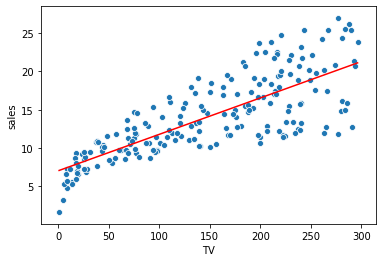

In [47]:
## Define the regresson model and fit it to the data
tv_model = sm.ols(formula = 'sales ~ TV', data=sales_data).fit()

# Add predicted to dataframe
sales_data['predicted_tv'] = tv_model.predict(sales_data.TV)

# Plot regression
ax = sns.lineplot(x='TV', y='predicted_tv', data=sales_data, color='red')
sns.scatterplot(x='TV', y='sales', data=sales_data, ax=ax)

Interpret both the slope and y-intercept:

In [35]:
## Print the model coefficient
print('Intercept = %4.3f  Slope = %4.3f' % (tv_model._results.params[0], 
                                            tv_model._results.params[1]))

Intercept = 7.033  Slope = 0.048


The regression model predicts that as TV advertising dollars increase, sales also increase at a gradual rate after an initial rapid increase up to 20 units in dollars. Due to this initial rapid increase, the intercept of the regression line occurs at just above 7 units in dollars results rather than at zero as would occur if the relationship were entirely gradual.

### Linear Regression 2: Radio

Here we examine the relationship between advertising dollars spent on radio ads for our product and sales.

Define a regression model, fit it to the data, and produce a labeled graph showing the best fit line with the data points:

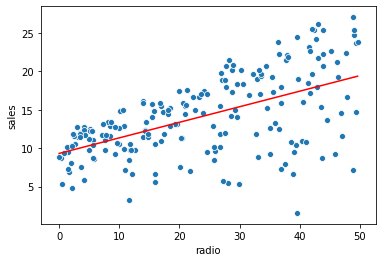

In [37]:
## Define the regresson model and fit it to the data
radio_model = sm.ols(formula = 'sales ~ radio', data=sales_data).fit()

# Add predicted to dataframe
sales_data['predicted_radio'] = radio_model.predict(sales_data.radio)

# Plot regression
ax = sns.lineplot(x='radio', y='predicted_radio', data=sales_data, color='red')
sns.scatterplot(x='radio', y='sales', data=sales_data, ax=ax)

Interpret both the slope and y-intercept:

In [29]:
## Print the model coefficient
print('Intercept = %4.3f  Slope = %4.3f' % (radio_model._results.params[0], 
                                            radio_model._results.params[1]))

Intercept = 9.312  Slope = 0.202


The relationship between radio advertising and sales is less tightly clustered around the regression line than is the case for TV advertising, suggesting that radio advertising has little impact in some markets, though in other markets the impact more closely resembles that of TV advertising. This diffuse relationship explains the higher intercept at above 9 units of sales dollars.

### Linear Regression 3: Newspaper

Here we examine the relationship between advertising dollars spent on newspaper ads for our product and sales.

Produce a labeled graph showing the best fit line with the data points:

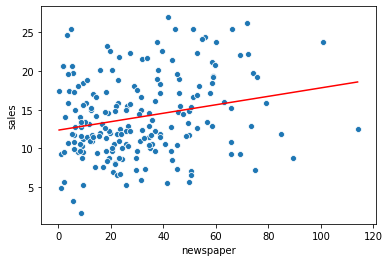

In [38]:
## Define the regresson model and fit it to the data
np_model = sm.ols(formula = 'sales ~ newspaper', data=sales_data).fit()

# Add predicted to dataframe
sales_data['predicted_np'] = np_model.predict(sales_data.newspaper)

# Plot regression
ax = sns.lineplot(x='newspaper', y='predicted_np', data=sales_data, color='red')
sns.scatterplot(x='newspaper', y='sales', data=sales_data, ax=ax)

Interpret both the slope and y-intercept:

In [33]:
## Print the model coefficient
print('Intercept = %4.3f  Slope = %4.3f' % (np_model._results.params[0], 
                                            np_model._results.params[1]))

Intercept = 12.351  Slope = 0.055


The low slope, high intercept, and diffuse scattering of points suggest that newspaper advertising has little demonstrable impact on sales.

### Linear Regression 4: TV, Radio, and Newspaper

Here we examine the relationship between advertising dollars spent on TV, radio, and newspaper ads for our product and sales.

First scale the data to give features common reference:

In [43]:
sales_data['tv_scaled'] = scale(sales_data['TV'])
sales_data['radio_scaled'] = scale(sales_data['radio'])
sales_data['newspaper_scaled'] = scale(sales_data['newspaper'])

Produce a model based on all three features, TV, radio, and newspaper advertising, and display summary:

In [44]:
## Define the regresson model and fit it to the data
full_model = sm.ols(formula = 'sales ~ tv_scaled + radio_scaled + newspaper_scaled', 
                    data=sales_data).fit()

# Add predicted to dataframe
sales_data['predicted_full'] = full_model.predict(sales_data[['tv_scaled', 
                                                              'radio_scaled', 'newspaper_scaled']])

# Display summary
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 22 Feb 2020   Prob (F-statistic):           1.58e-96
Time:                        21:09:43   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.0225      0.119    117.655      0.000      13.787      14.258
tv_scaled            3.9193      0.119     32.809      0.000       3.684       4.155
radio_scaled         2.7921      0.128     21.893      0.000       2.541       3.044
newspaper_scaled    -0.0225      0.128     -0.177      0.860      -0.274       0.229
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interpret Partial Slopes and Intercept Parameters

The partial slope for TV advertising (3.9) is the highest, suggesting that investment in TV advertising has the steepest returns. The partial slope for radio advertising (2.8), while not as high as for TV advertising, still points to a increasing return in investment for radio advertising. On the other hand, the slight negative slope assigned to newspaper advertising (-0.02) suggests that investments in newspaper advertising are a waste of money. The intercept of 14 suggests that the initial investment in advertising has rapid returns before the rate of increase stabilizes to a more gradual level.

#### Interpret the Adjusted R-Squared

The adjusted R-squared of 0.9 suggests that the regression model explains 90% of the variability in the data set, which corresponds to a good fit.

#### Find and Report the Mean-Squared Error

To determine the mean-squared error we first compute the residuals by subtracting the actual sales data from the predicted sales data:

In [48]:
# Add residuals to pandas dataframe
sales_data['resids'] = np.subtract(sales_data.predicted_full, sales_data.sales)

We then compute the root mean-squared error, the square root of the variance of the residuals, which we can interpret as the standard deviation of the unexplained variance:

In [49]:
## Print RMSE
RMSE = np.std(sales_data.resids)
print('RMSE = %4.3f' % (RMSE))

RMSE = 1.669


The variability in error indicated by the RMSE suggests that the model is not an optimal fit for the data.

### Summary

TODO